In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import zipfile
import pandas
import datetime
weather = pandas.read_csv('weather/daily2013.csv', index_col=0, parse_dates=True)

In [3]:
date0 = datetime.date(2013, 1, 1)

In [4]:
str(date0)

'2013-01-01'

In [5]:
dates = [date0 + datetime.timedelta(n) for n in range(366)]
dates[-1]

datetime.date(2014, 1, 1)

In [6]:
weather.index.dtype

dtype('<M8[ns]')

In [25]:
taxidir = Path('taxidata')
by_date = {}
for date in dates:
    cur_data = []
    for n in range(1, 13):
        path = taxidir / ('trip_data_%d.csv.zip' % n)
        with path.open('rb') as fd:
            unzipped = zipfile.ZipFile(fd)
            fname, = unzipped.namelist()
            data = pandas.read_csv(unzipped.open(fname),
                                   parse_dates=['pickup_datetime', 'dropoff_datetime'], 
                                   index_col='pickup_datetime',
                                   chunksize=1000000
                                  )
            for n, datum in enumerate(data):
                print(date, 'chunk', n)
                date_data = datum[str(date)]
                cur_data.append(date_data)
        break
    concatted = pandas.concat(cur_data)
    by_date[date] = concatted.describe()

2013-01-01 chunk 0
2013-01-01 chunk 1
2013-01-01 chunk 2
2013-01-01 chunk 3
2013-01-01 chunk 4
2013-01-01 chunk 5
2013-01-01 chunk 6
2013-01-01 chunk 7
2013-01-01 chunk 8
2013-01-01 chunk 9
2013-01-01 chunk 10
2013-01-01 chunk 11
2013-01-01 chunk 12
2013-01-01 chunk 13
2013-01-01 chunk 14
2013-01-02 chunk 0
2013-01-02 chunk 1
2013-01-02 chunk 2
2013-01-02 chunk 3
2013-01-02 chunk 4
2013-01-02 chunk 5
2013-01-02 chunk 6
2013-01-02 chunk 7
2013-01-02 chunk 8
2013-01-02 chunk 9
2013-01-02 chunk 10
2013-01-02 chunk 11
2013-01-02 chunk 12
2013-01-02 chunk 13
2013-01-02 chunk 14
2013-01-03 chunk 0
2013-01-03 chunk 1
2013-01-03 chunk 2
2013-01-03 chunk 3
2013-01-03 chunk 4
2013-01-03 chunk 5
2013-01-03 chunk 6
2013-01-03 chunk 7
2013-01-03 chunk 8
2013-01-03 chunk 9
2013-01-03 chunk 10
2013-01-03 chunk 11
2013-01-03 chunk 12
2013-01-03 chunk 13
2013-01-03 chunk 14
2013-01-04 chunk 0
2013-01-04 chunk 1
2013-01-04 chunk 2
2013-01-04 chunk 3
2013-01-04 chunk 4
2013-01-04 chunk 5
2013-01-04 chunk

CParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [31]:
by_date_full = {}
for k,v in sorted(by_date.items()):
    if v.pickup_latitude['count'] > 100e3:
        by_date_full[k] = v
        print(k)

2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05
2013-01-06
2013-01-07
2013-01-08
2013-01-09
2013-01-10
2013-01-11
2013-01-12
2013-01-13
2013-01-14
2013-01-15
2013-01-16
2013-01-17
2013-01-18
2013-01-19
2013-01-20
2013-01-21
2013-01-22
2013-01-23
2013-01-24
2013-01-25
2013-01-26
2013-01-27
2013-01-28
2013-01-29
2013-01-30
2013-01-31


In [70]:
import pickle
if len(by_date_full) > 20:
    with open('taxidata/jan_descr.pkl', 'wb') as fd:
        pickle.dump(by_date_full, fd)

In [42]:
d=dates[0]
d.weekday()
d

datetime.date(2013, 1, 1)

In [50]:
d.weekday() > 6

False

In [51]:
s.index

Index([2013-01-01, 2013-01-02, 2013-01-03, 2013-01-04, 2013-01-05, 2013-01-06,
       2013-01-07, 2013-01-08, 2013-01-09, 2013-01-10, 2013-01-11, 2013-01-12,
       2013-01-13, 2013-01-14, 2013-01-15, 2013-01-16, 2013-01-17, 2013-01-18,
       2013-01-19, 2013-01-20, 2013-01-21, 2013-01-22, 2013-01-23, 2013-01-24,
       2013-01-25, 2013-01-26, 2013-01-27, 2013-01-28, 2013-01-29, 2013-01-30,
       2013-01-31],
      dtype='object')

In [58]:
d=dates[0]


[2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4]

In [61]:
dates.weekday

array([1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3], dtype=int32)

In [67]:
for d in dates:
    print(d.)

1356998400000000000
1357084800000000000
1357171200000000000
1357257600000000000
1357344000000000000
1357430400000000000
1357516800000000000
1357603200000000000
1357689600000000000
1357776000000000000
1357862400000000000
1357948800000000000
1358035200000000000
1358121600000000000
1358208000000000000
1358294400000000000
1358380800000000000
1358467200000000000
1358553600000000000
1358640000000000000
1358726400000000000
1358812800000000000
1358899200000000000
1358985600000000000
1359072000000000000
1359158400000000000
1359244800000000000
1359331200000000000
1359417600000000000
1359504000000000000
1359590400000000000


In [82]:
weather.PrecipitationIn.corr(s)

0.42409799757194505

In [ ]:
pandas.Series

In [96]:
cols = dict(
    median_time=lambda v: v.trip_time_in_secs['50%'],
    median_dist=lambda v: v.trip_distance['50%'],
    count=lambda v: v.trip_distance['count']
)

sers = {}
for name, f in sorted(cols.items()):
    kvs = [(k, f(v)) for k,v in sorted(by_date_full.items())]
    dates, values = zip(*kvs)
    dates = pandas.DatetimeIndex(dates, freq='D')
    sers[name] = pandas.Series(values, dates)
df = pandas.DataFrame.from_dict(sers)

In [97]:
df

,count,median_dist,median_time
2013-01-01,412630,2.02,540
2013-01-02,393001,1.70,540
2013-01-03,441233,1.68,540
2013-01-04,478437,1.67,540
2013-01-05,473804,1.79,540
2013-01-06,403667,1.90,530
2013-01-07,407363,1.70,540
2013-01-08,441778,1.70,548
2013-01-09,457471,1.70,565
2013-01-10,487949,1.70,600


In [92]:


kvs = [(k, v) for k,v in sorted(by_date_full.items())]
dates, values = zip(*kvs)
dates = pandas.DatetimeIndex(dates, freq='D')
columned = {k:f(values) for k,f in cols.items()}
df = pandas.DataFrame.from_dict(columned, index=dates)

AttributeError: 'tuple' object has no attribute 'trip_distance'

In [ ]:
pandas.DatetimeIndex()

In [87]:
str(dates[0])

'2013-01-01 00:00:00'

In [86]:
weather[]

KeyError: '2013-01-01 00:00:00'

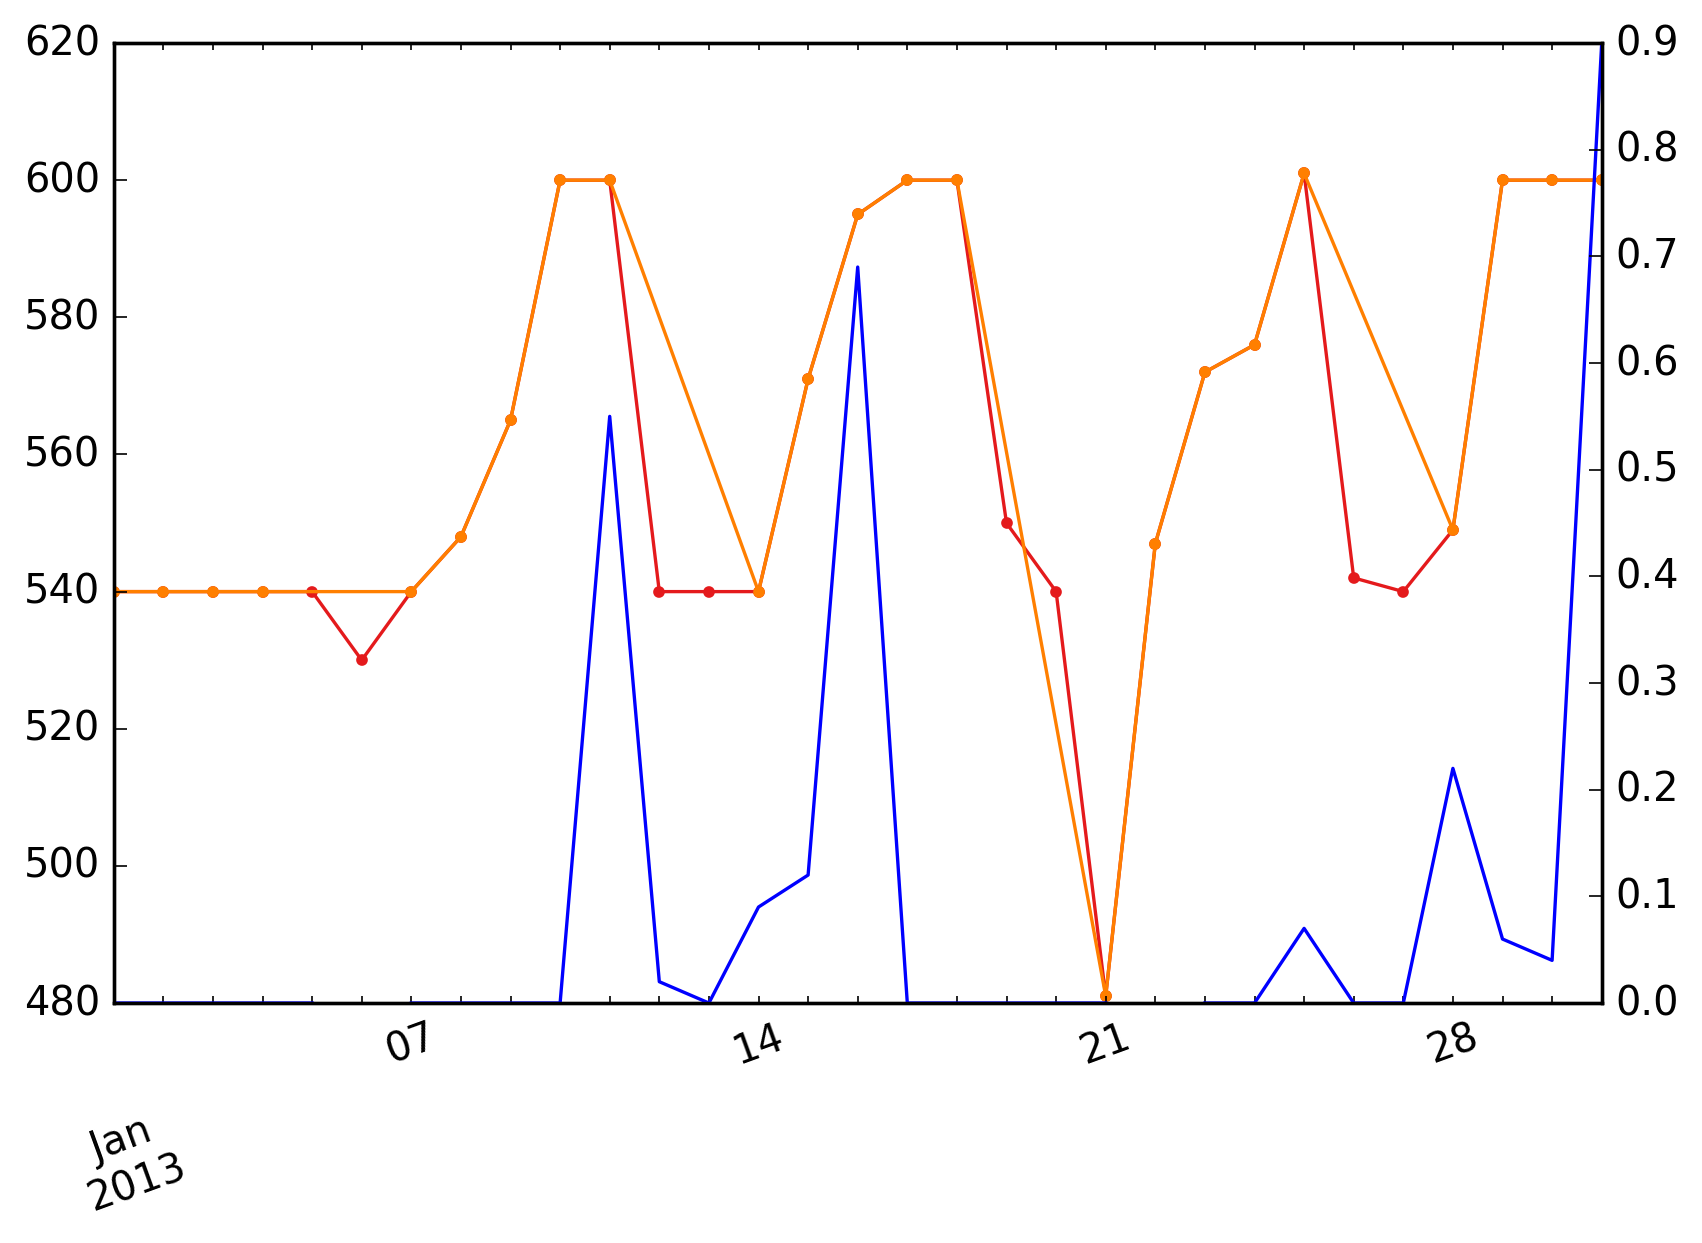

In [77]:
fig, ax = plt.subplots()

kvs = [(k, v.trip_time_in_secs['50%']) for k,v in sorted(by_date_full.items())]
dates, values = zip(*kvs)
dates = pandas.DatetimeIndex(dates)
ix = dates.weekday <= 4
s = pandas.Series(values, dates)
s.plot(rot=20, marker='.', color=red)
s[ix].plot(rot=20, marker='.', color=orange)
ax2 = ax.twinx()

In [35]:
pandas.Series?

In [17]:
descr = concatted.describe()

In [22]:
descr.trip_time_in_secs['50%']

540.0

In [ ]:
data.index

In [ ]:
dates[0], dates[14]

In [ ]:
print(*data.columns)

In [ ]:
data

In [ ]:
tg = pandas.TimeGrouper(freq='D')
grouped = data.groupby(tg)

grouped.trip_distance.count()

In [ ]:
tg = pandas.TimeGrouper(freq='D')
grouped = data.groupby(tg)

grouped.trip_distance.median()